In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


PID_df_all_noproton_shuffled = pd.read_pickle("PID_df_all_noproton_shuffled.pkl")

training_PID_df_all_noproton_shuffled = pd.read_pickle("training_PID_df_all_noproton_shuffled.pkl")

PID_df_all_shuffled = pd.read_pickle("PID_df_all_shuffled.pkl")

new_df_jpsipr = pd.read_pickle("new_df_jpsipr.pkl")

In [2]:
PID_df_all_noproton_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
881642,881642,0.549045,2,2.188629,0.158048,0.132954,2.329958,3.006494,2.401494,0.491195,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
749437,749437,0.889853,2,2.405505,0.220032,0.281883,1.636728,2.658446,2.241887,0.328982,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
94239,94239,0.496483,2,2.274467,0.227451,0.550911,2.569138,3.091312,2.191996,0.014456,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1993089,1993089,0.761125,2,2.354695,0.112537,0.225047,1.874902,2.796014,2.173810,0.482775,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
114475,114475,0.638879,2,2.331662,0.144052,0.327746,2.189774,2.941395,2.263823,0.071942,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581447,1581447,1.013795,2,2.345323,0.018687,0.015628,1.239335,2.438271,2.354203,0.011440,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1191312,1191312,0.400533,2,2.252819,0.542329,0.988130,2.848852,3.186911,2.067023,0.062413,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
119429,119429,0.422942,2,2.018859,0.198769,0.310288,2.662257,3.128419,2.090151,0.007201,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1934220,1934220,0.561886,2,2.275352,0.081669,0.338569,2.365765,3.015917,2.228149,0.063409,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [3]:
training_PID_df_all_noproton_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
17108,17108,2.713283,2,2.381177,0.048052,0.007832,0.157611,0.772807,2.543777,0.609080,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
27958,27958,0.222224,2,6.012999,0.166965,1.394032,3.131297,3.275617,6.867983,0.122688,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
23871,23871,1.558899,2,2.374719,0.047812,0.047601,0.904985,2.170196,1.980224,1.304264,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
12452,12452,0.391635,2,2.092961,0.187017,0.710799,2.807318,3.174987,1.998865,0.051666,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
8017,8017,1.889485,2,45.279058,88.739492,65.862828,6.938028,0.341141,51.708548,100.917075,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,17803,1.990565,2,3.941926,20.266072,19.198692,6.224386,0.058694,3.124813,17.615529,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
27751,27751,2.749804,2,2.438832,0.247408,0.194476,0.041247,0.901481,2.520137,0.527900,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
8109,8109,3.687727,4,2.455796,0.327694,0.268193,0.154420,0.259334,2.294668,0.251280,...,3.623558,2.338121,0.342572,2.920218,3.215215,2.371509,0.019057,0.040766,0.294378,0.520783
8465,8465,0.373821,2,2.181797,0.531261,1.038511,2.900183,3.203943,1.960352,0.007587,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
PID_df_all_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,...,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
1353431,1353431,0.544176,2,2.157953,0.240627,0.063388,2.319995,3.004127,2.225415,0.035496,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1469609,1469609,0.507984,2,2.286905,0.233750,0.541022,2.542839,3.081469,2.220399,0.036757,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
37822,37822,3.076568,2,2.420605,0.190836,0.132761,0.151358,0.560248,2.336623,0.098312,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1693189,1693189,0.511106,2,2.365108,0.458151,0.739405,2.593036,3.097073,2.200582,0.030417,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
316723,316723,1.362076,2,2.438147,0.254448,0.240980,0.869647,2.071587,2.299969,0.220800,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810839,1810839,0.233573,2,1.768154,0.067545,1.261579,3.107539,3.268836,1.056079,0.523390,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
309833,309833,0.346891,2,1.847362,0.003881,0.683582,2.879025,3.199111,1.857366,0.018586,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
27714,27714,0.698245,2,2.265936,0.129024,0.027613,1.931244,2.835750,2.209688,0.311478,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1264305,1264305,0.386414,2,1.948067,0.140661,0.451970,2.765471,3.162781,2.271928,0.671523,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [5]:
X_PID = training_PID_df_all_noproton_shuffled[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
# # Extract mass separately
# mass = df['mass'].values
mass_PID = training_PID_df_all_noproton_shuffled['InvariantMass'].values
# # Create a train/test split
X_PID_train, X_PID_test, mass_PID_train, mass_PID_test = train_test_split(X_PID, mass_PID, test_size=0.05, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform training data, transform test data
X_PID_train = scaler.fit_transform(X_PID_train)
X_PID_test = scaler.transform(X_PID_test)

print(X_PID_train.shape, X_PID_test.shape)

(171000, 21) (9000, 21)


In [6]:
print(X_PID_train.shape[0])

171000


In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())
# tf.debugging.set_log_device_placement(True)

TensorFlow version: 2.16.2
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU (if any)


In [9]:
# #------------------------------------------
# # 2. Define the Autoencoder Model
# #------------------------------------------

input_dim = X_PID_train.shape[1]  # should be 6
encoding_dim = 11             # latent space dimension

# # Input layer
input_layer = Input(shape=(input_dim,))

# # Encoding layer (compression)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# # Decoding layer (reconstruction)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# # Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='mse')
from tensorflow.keras.optimizers import Adam
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # best, 185 epochs automatic stop

#------------------------------------------
# 3. Train the Autoencoder
#------------------------------------------

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=2,
    restore_best_weights=True
)

history = autoencoder.fit(X_PID_train, X_PID_train, 
                          epochs=500,
                          # epochs=500,
                          batch_size=256,
                        #   batch_size=64,
                          shuffle=True,
                          validation_data=(X_PID_test, X_PID_test),
                          verbose=2,
                          callbacks=[early_stopping]
                         )

# with tf.device('/CPU:0'):
#     history = autoencoder.fit(X_train, X_train,
#                               epochs=500,
#                               batch_size=64,
#                               validation_data=(X_test, X_test),
#                               callbacks=[early_stopping],
#                               verbose=2)
#     print(f"Training stopped at epoch {len(history.history['loss'])}")

print(f"Training stopped at epoch {len(history.history['loss'])}")


Epoch 1/500
668/668 - 3s - 4ms/step - loss: 0.0064 - val_loss: 9.4772e-04
Epoch 2/500
668/668 - 1s - 2ms/step - loss: 7.1104e-04 - val_loss: 4.2411e-04
Epoch 3/500
668/668 - 1s - 2ms/step - loss: 3.2337e-04 - val_loss: 2.7368e-04
Epoch 4/500
668/668 - 1s - 2ms/step - loss: 2.3626e-04 - val_loss: 2.2330e-04
Epoch 5/500
668/668 - 1s - 2ms/step - loss: 1.9883e-04 - val_loss: 1.9442e-04
Epoch 6/500
668/668 - 1s - 2ms/step - loss: 1.7393e-04 - val_loss: 1.7144e-04
Epoch 7/500
668/668 - 1s - 2ms/step - loss: 1.5133e-04 - val_loss: 1.5423e-04
Epoch 8/500
668/668 - 1s - 2ms/step - loss: 1.3727e-04 - val_loss: 1.4248e-04
Epoch 9/500
668/668 - 1s - 2ms/step - loss: 1.2990e-04 - val_loss: 1.4124e-04
Epoch 10/500
668/668 - 1s - 2ms/step - loss: 1.2662e-04 - val_loss: 1.4043e-04
Epoch 11/500
668/668 - 1s - 2ms/step - loss: 1.2316e-04 - val_loss: 1.3282e-04
Epoch 12/500
668/668 - 1s - 2ms/step - loss: 1.2025e-04 - val_loss: 1.3069e-04
Epoch 13/500
668/668 - 1s - 2ms/step - loss: 1.1885e-04 - val_los

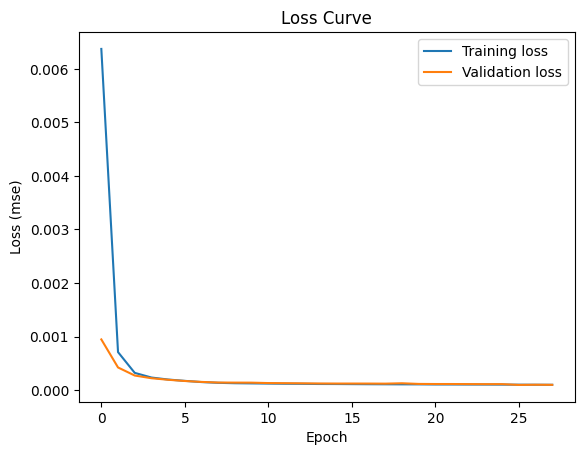

In [10]:
# Optional: Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.title('Loss Curve')
plt.legend()
plt.savefig("final_loss2.pdf")
plt.show()

In [11]:
# #------------------------------------------
# # 4. Use the Autoencoder for Anomaly Detection
# #------------------------------------------

# # Compute reconstruction on the test set
X_PID_test_pred = autoencoder.predict(X_PID_test)
# # Calculate MSE per sample
mse = np.mean(np.power(X_PID_test - X_PID_test_pred, 2), axis=1)
#plot

# You need to define a threshold for what you consider "anomalous"
# This could be determined by analyzing the MSE distribution on training data, for example.
threshold = 0.01 #np.mean(mse) + 3*np.std(mse)  # Example heuristic

# Find anomalous events
anomalous_indices = np.where(mse > threshold)[0]

#------------------------------------------
# 5. Retrieve the Mass for Anomalous Events
#------------------------------------------

# For any anomalous event, we can now look up its mass
if len(anomalous_indices) > 0:
    print("Anomalous Event Indices:", anomalous_indices)
    print("Mass values for anomalous events:", mass_PID_test[anomalous_indices])
else:
    print("No anomalies detected under this threshold.")


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Anomalous Event Indices: [2195]
Mass values for anomalous events: [3.57307845]


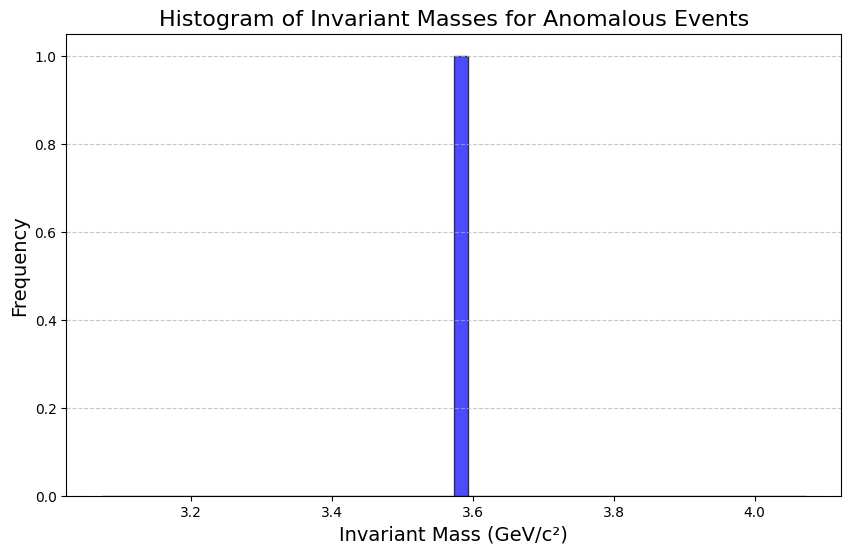

In [12]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(mass_PID_test[anomalous_indices], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Invariant Masses for Anomalous Events', fontsize=16)
plt.xlabel('Invariant Mass (GeV/c²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()

In [13]:
mse_threshold = 0.01
mass_cutoff = 0

df_mass_cut_noexotica = PID_df_all_noproton_shuffled[PID_df_all_noproton_shuffled['InvariantMass'] > mass_cutoff]
X_alice_noexotica = df_mass_cut_noexotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_alice_noexotica = scaler.transform(X_alice_noexotica)

X_alice_noexotica_pred = autoencoder.predict(X_alice_noexotica)
mse_alice_noexotica = np.mean(np.power(X_alice_noexotica - X_alice_noexotica_pred, 2), axis=1)

df_high_mse_noexotica = df_mass_cut_noexotica[mse_alice_noexotica > mse_threshold]
alice_noexotica_masses = df_high_mse_noexotica['InvariantMass'].values

# ALICE, with exotica
df_mass_cut_exotica = PID_df_all_shuffled[PID_df_all_shuffled['InvariantMass'] > mass_cutoff]
X_alice_exotica = df_mass_cut_exotica[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_alice_exotica = scaler.transform(X_alice_exotica)

X_alice_exotica_pred = autoencoder.predict(X_alice_exotica)
mse_alice_exotica = np.mean(np.power(X_alice_exotica - X_alice_exotica_pred, 2), axis=1)

df_high_mse_exotica = df_mass_cut_exotica[mse_alice_exotica > mse_threshold]
alice_exotica_masses = df_high_mse_exotica['InvariantMass'].values

72103/72103 ━━━━━━━━━━━━━━━━━━━━ 155s 2ms/step
72179/72179 ━━━━━━━━━━━━━━━━━━━━ 203s 3ms/step


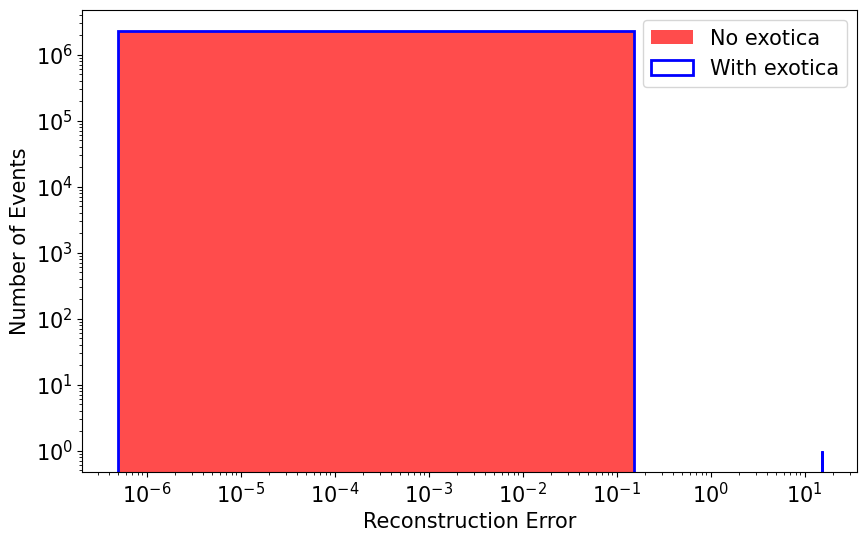

In [14]:
combined = np.concatenate([mse_alice_noexotica, mse_alice_exotica])

n_bins = 100

bin_edges = np.linspace(combined.min(), combined.max(), n_bins + 1)

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis

# Plot reconstruction error for normal events
plt.hist(mse_alice_noexotica, bins=bin_edges, alpha=0.7, label='No exotica', color='red')
plt.hist(mse_alice_exotica, bins=bin_edges, histtype='step', color='blue', linewidth=2, label='With exotica')

# plt.hist(mse_normal, bins=50, alpha=0.7, label='Normal Events (Label 1)', color='blue')

# Plot reconstruction error for anomalous events
#plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events', color='red')
#plt.hist(mse_anomalous, bins=50, alpha=0.7, label='Anomalous Events (Label 0)', color='red')

# Add labels and title
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
#plt.title('Reconstruction Error Distribution for ALICE cocktail, w/ and w/o exotica')
#plt.ylim(0.01,10**8)
#plt.xlim(0.01,100)
plt.legend()

plt.savefig("final_error_proton_PID.pdf")

# Show the plot
plt.show()

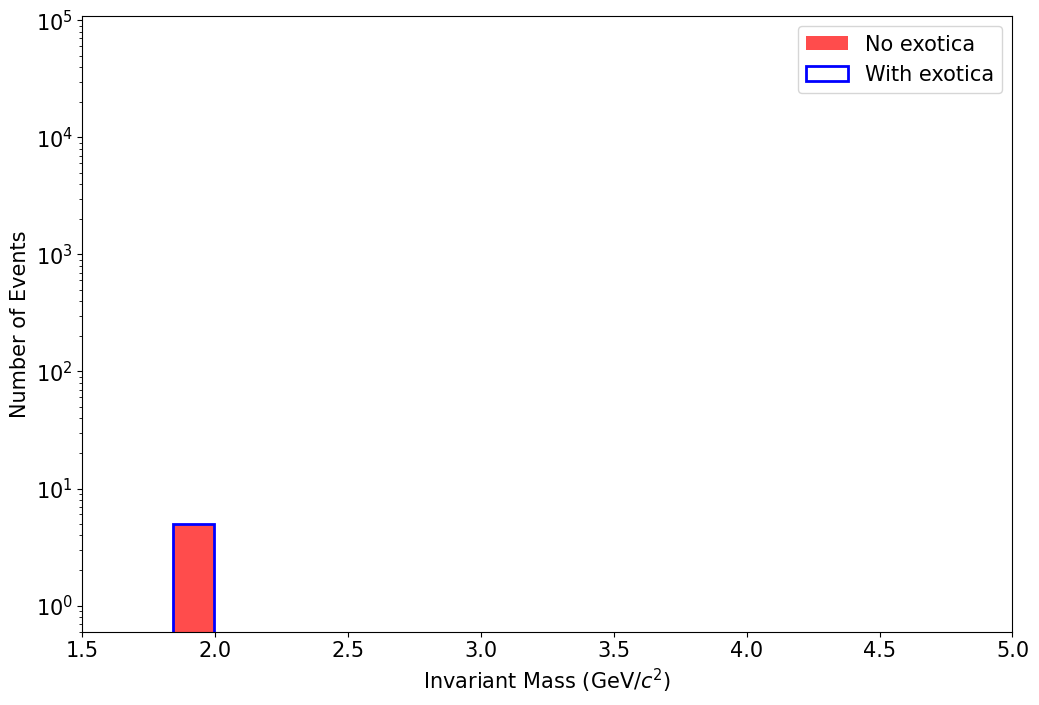

In [15]:
mse_threshold = 0.01

# alice_noexotica_high_mse = new_df_all_nopq_shuffled[mse_alice_noexotica > mse_threshold]
# alice_noexotica_masses = alice_noexotica_high_mse['InvariantMass'].values

# # Filter cocktail with exotica with reconstruction error above the threshold
# alice_exotica_high_mse = new_df_all_anomalies_shuffled[mse_alice_exotica > mse_threshold]
# alice_exotica_masses = alice_exotica_high_mse['InvariantMass'].values


# Plot the invariant mass distribution
plt.figure(figsize=(12, 8))

plt.hist(alice_noexotica_masses, bins=bin_edges, alpha=0.7, label='No exotica', color='red')
plt.hist(alice_exotica_masses, bins=bin_edges, histtype='step', color='blue', linewidth=2, label='With exotica')

# Add labels and title
plt.xlabel(r'Invariant Mass (GeV/$c^2$)')
plt.ylabel('Number of Events')
plt.xlim(1.5,5)
#plt.ylim(0.1,100)
plt.yscale('log')
#plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold}')
plt.ylim(0.6,110000)
plt.legend()
plt.savefig("final_mass_proton_PID.pdf")
# Show the plot
plt.show()

In [16]:

proton_count_anom = np.sum((alice_exotica_masses >= 2.8) & (alice_exotica_masses <= 3.2))
print(proton_count_anom)

jpsi_count = np.sum((alice_noexotica_masses >= 2.8) & (alice_noexotica_masses <= 3.2))
print(jpsi_count)


0
0


In [20]:
df_jpsipro = new_df_jpsipr[new_df_jpsipr['InvariantMass'] > mass_cutoff]
X_jpsi_pro = df_jpsipro[['NTracks','NSigmaEl1','NSigmaMu1','NSigmaPi1','NSigmaKa1','NSigmaPr1','NSigmaEl2','NSigmaMu2','NSigmaPi2','NSigmaKa2','NSigmaPr2','NSigmaEl3','NSigmaMu3','NSigmaPi3','NSigmaKa3','NSigmaPr3','NSigmaEl4','NSigmaMu4','NSigmaPi4','NSigmaKa4','NSigmaPr4']].values
X_jpsi_pro = scaler.transform(X_jpsi_pro)

X_jpsipro_pred = autoencoder.predict(X_jpsi_pro)
mse_jpsipro = np.mean(np.power(X_jpsi_pro - X_jpsipro_pred, 2), axis=1)

df_high_mse_jpsipro = df_jpsipro[mse_jpsipro > mse_threshold]
jpsipro_masses = df_high_mse_jpsipro['InvariantMass'].values


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


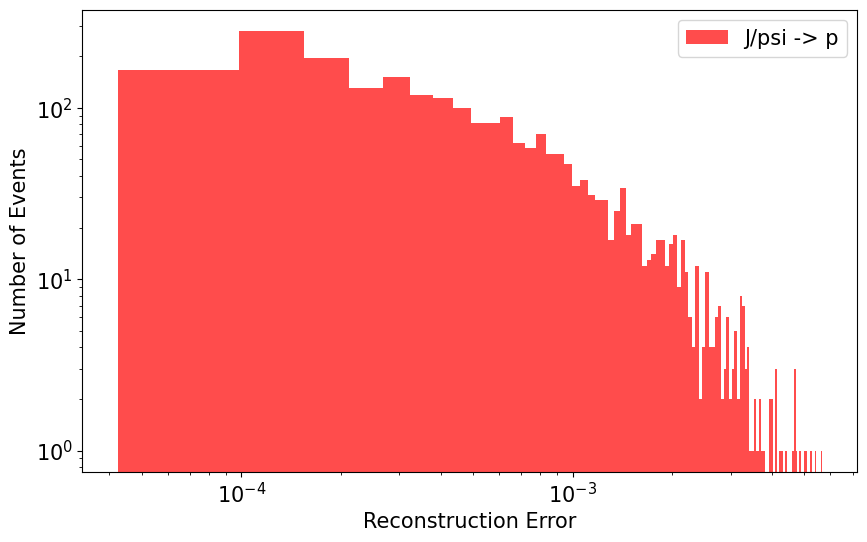

In [21]:


plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.hist(mse_jpsipro, bins=100, alpha=0.7, label='J/psi -> p', color='red')


# Add labels and title
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Events')
#plt.title('Reconstruction Error Distribution for ALICE cocktail, w/ and w/o exotica')
#plt.ylim(0.01,10**8)
#plt.xlim(0.01,100)
plt.legend()

#plt.savefig("final_error_proton_PID.pdf")

# Show the plot
plt.show()

/var/folders/tr/t57ln4fs7ngcr_h6w3njkb9h0000gn/T/ipykernel_3961/502226901.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


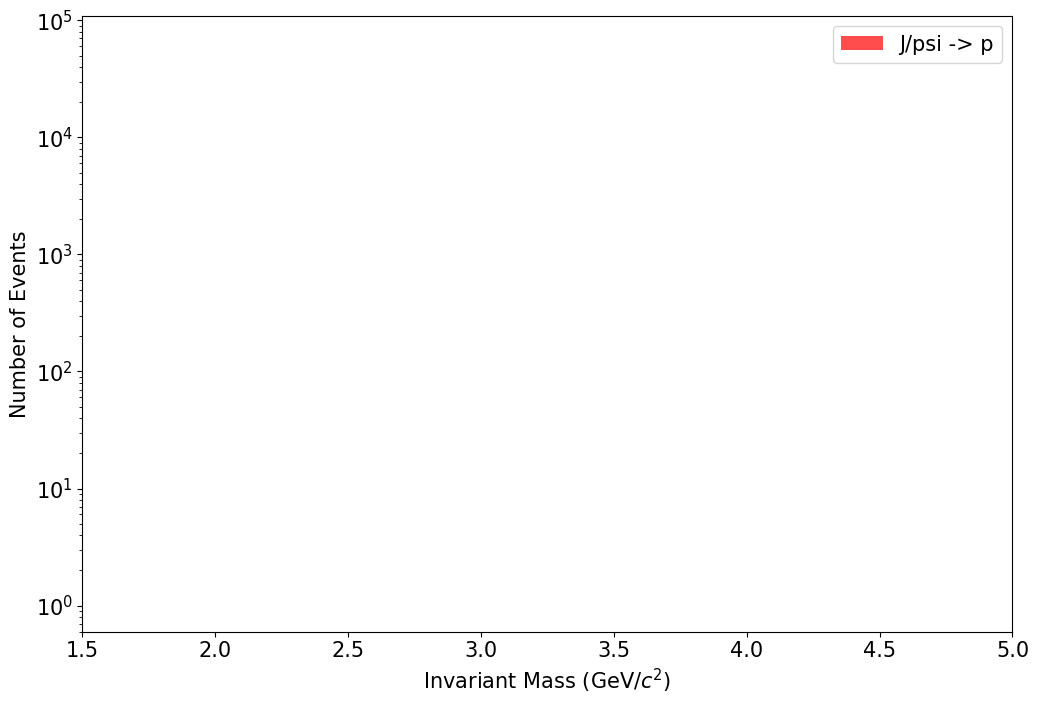

In [23]:
plt.figure(figsize=(12, 8))

plt.hist(jpsipro_masses, bins=100, alpha=0.7, label='J/psi -> p', color='red')

# Add labels and title
plt.xlabel(r'Invariant Mass (GeV/$c^2$)')
plt.ylabel('Number of Events')
plt.xlim(1.5,5)
#plt.ylim(0.1,100)
plt.yscale('log')
#plt.title(f'Invariant Mass Distribution for Events with MSE > {mse_threshold}')
plt.ylim(0.6,110000)
plt.legend()
#plt.savefig("final_mass_proton_PID.pdf")
# Show the plot
plt.show()